# TITANIC DATASET

Los datos se han dividido en dos grupos: 
- conjunto de entrenamiento (train.csv) 
- conjunto de prueba (test.csv) 

El conjunto de entrenamiento debe usarse para crear sus modelos de aprendizaje automático. Para el conjunto de entrenamiento, proporcionamos el resultado (también conocido como la "verdad en tierra") para cada pasajero. Su modelo se basará en "características" como el género y la clase de los pasajeros. También puede utilizar la ingeniería de funciones para crear nuevas funciones. 

El conjunto de prueba debe usarse para ver qué tan bien se desempeña su modelo con datos invisibles. Para el equipo de prueba, no proporcionamos la verdad en tierra para cada pasajero. Es su trabajo predecir estos resultados. Para cada pasajero en el conjunto de prueba, use el modelo que entrenó para predecir si sobrevivieron o no al hundimiento del Titanic.

Columnas con las que vamos a trabajar:

- PassengerId: Id único de pasajero
- Survived: Indica si este pasajero sobrevivió o no
- pclass: Es la clase del ticket de pasajero, tenemos de primera, segunda y tercera clase.
- Name: Nombre del pasajero
- Sex: Genero del pasajero
- Age: Edad
- sibsp: Esta columna nos da la suma de hermanos/pareja del pasajero que estan en el barco.
- parch: Esta columna nos indica la suma de padres/hijos del pasajero que estan en el barco.
- ticket: El numero de ticket
- fare: El costo del pasaje que pago el pasajero.
- cabin: Numero de cabina del pasajero
- embarked: El puerto donde embarco el pasajero, siendo C: Cherbourg, Q: Queenstown y S: Southampton

#### Importamos librerías

In [1]:
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series
%matplotlib inline
import math

In [2]:
def strat(df):
    #estratificacion por  precio de ticket
    
    rangos = list(range(-9,110,10)) + [np.inf]
    df["fare_buckets"] = pd.cut(df["Fare"],
                                bins= rangos ,
                                labels = [1,2,3,4,5,6,7,8,9,10,11,12])    
    return df


def titles(df):
    
    #diccionario que transforma el titulo en Mr Mrs y Master
    titulos = {' Mr': 'Mr', ' Mrs': 'Mrs', ' Miss': 'Miss', ' Master':' Master', ' Don': 'Mr', ' Rev': 'Mr', ' Dr': 'Mr', ' Mme': 'Mrs',
       ' Ms': 'Mrs', ' Major': 'Mr', ' Lady': 'Mrs', ' Sir': 'Mr', ' Mlle': 'Mrs', ' Col': 'Mr', ' Capt': 'Mr',
       ' the Countess': 'Mrs', ' Jonkheer': 'Mr'} 
    
    df["title"] = df["Name"].str.split(',', expand = True)[1].str.split('.', expand = True)[0]
    
    #modificar la siguiente funcion para que si el titulo no aparece en el diccionario devuelva una categoria "other c"
    df["title"] = df["title"].apply(lambda x: titulos[x] if (x in titulos) else 'other')
    
    return df


def fillAge(df):
    df["Age"] = df[['Age','title']].groupby("title").transform(lambda x: x.fillna(x.median()))
    return df


def preprocessedData(df):
    df = strat(df)
    df = titles(df)
    df = fillAge(df)
    #agregar estandarizar o normalizar la data
    return df

#### Leemos csvs

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [20]:
train.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [21]:
test.head(10)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0  34.5      0      0     330911   7.8292   NaN        Q  
1  47.0      1      0     363272   7.0000   NaN        S  
2  62.0      0      0     240276   9.6875   NaN        Q  
3  27.0      0      0     315154   8.6625   NaN        S  
4  22.0      1      1    3101298  12.2875   NaN        S  
5  14.0      0      0       7538   9.2250   NaN        S  
6  30.0      0      0     330972   7.6292   NaN        Q  
7  26.0      1      1     248738  29.0000   NaN        S  
8  18.0      0      0       2657   7.2292   NaN        C  
9  21.0      2      0  A/4 48871  24.1500   NaN        S

#### Exploratory Data Analysis (EDA)

Tipos de dato por columna

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [8]:
test.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

In [9]:
from pandas_profiling import ProfileReport

ProfileReport(train)

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
ProfileReport(test)

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Ploteamos histogramas para ver la dispersión que tienen los datos por columna

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

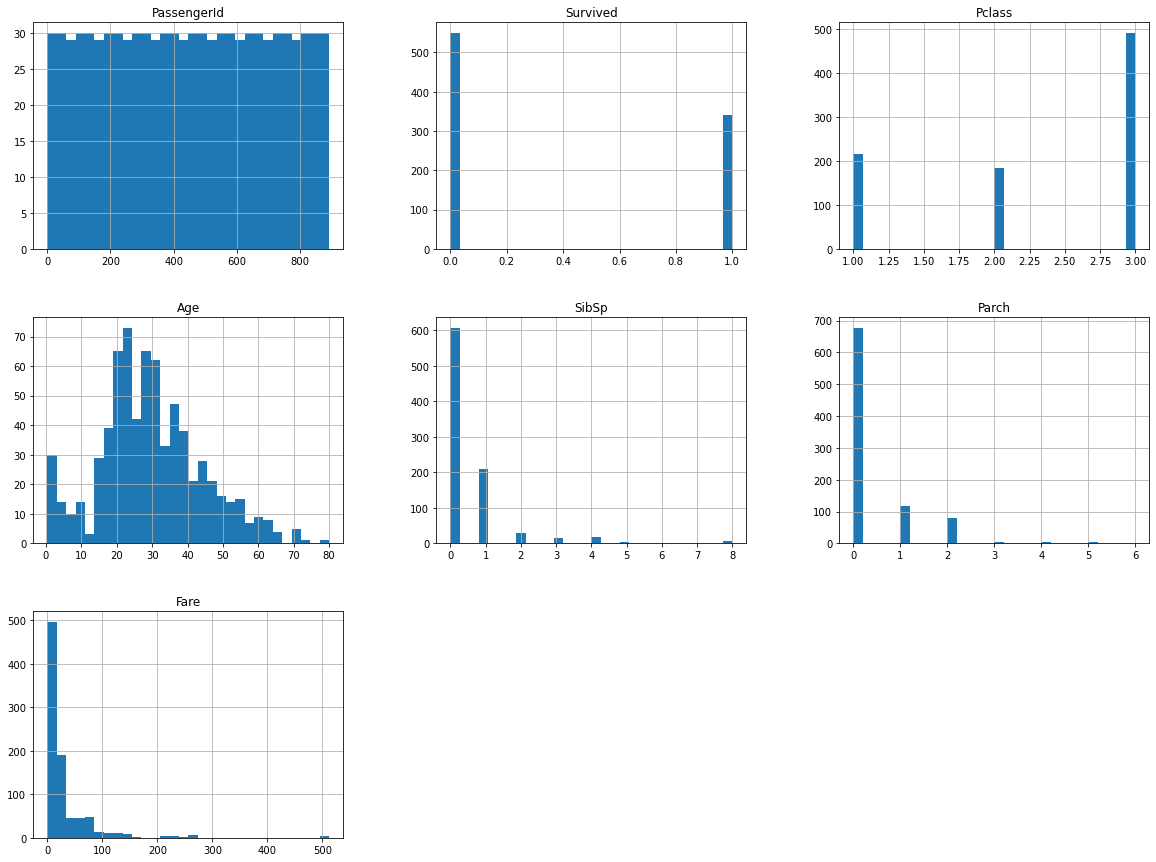

In [11]:
train.hist(bins = 30, figsize=(20,15))

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

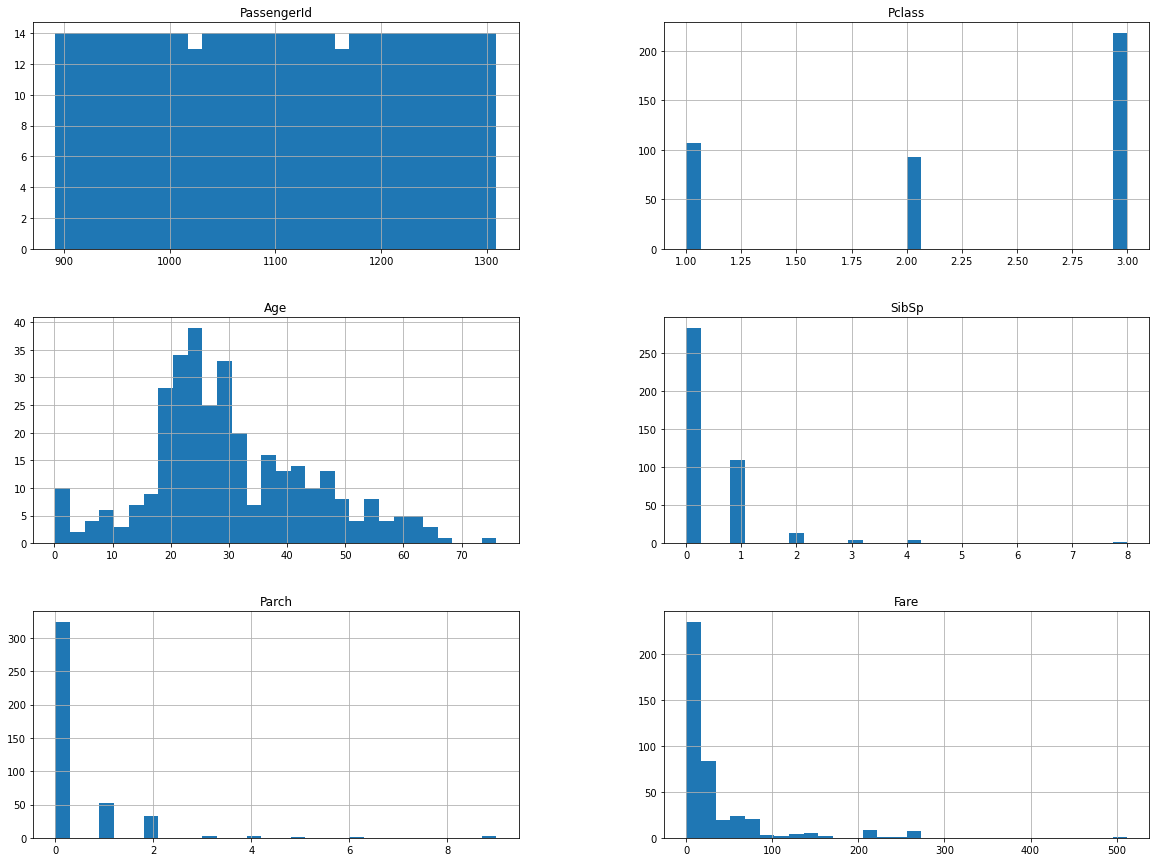

In [12]:
test.hist(bins = 30, figsize=(20,15))

#### Analaizamos nulls

In [13]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

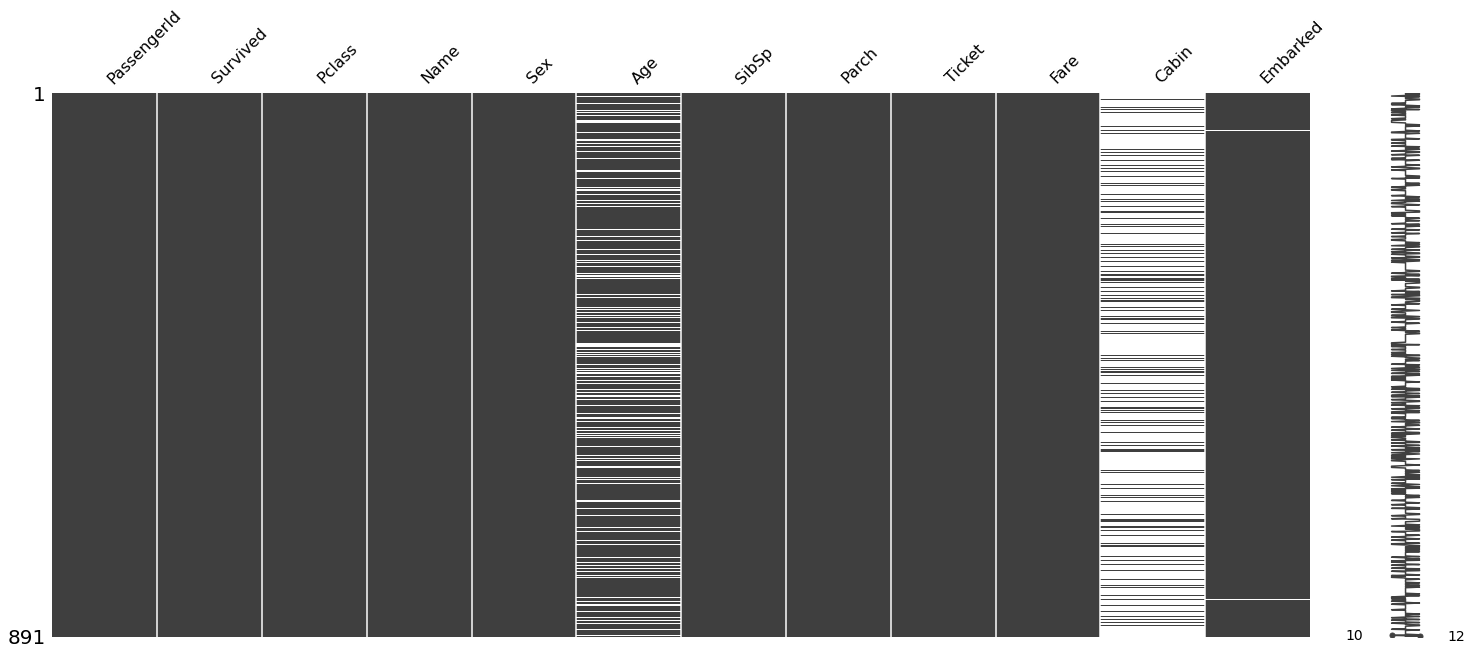

In [15]:
import missingno as msno

msno.matrix(train)

<AxesSubplot:>

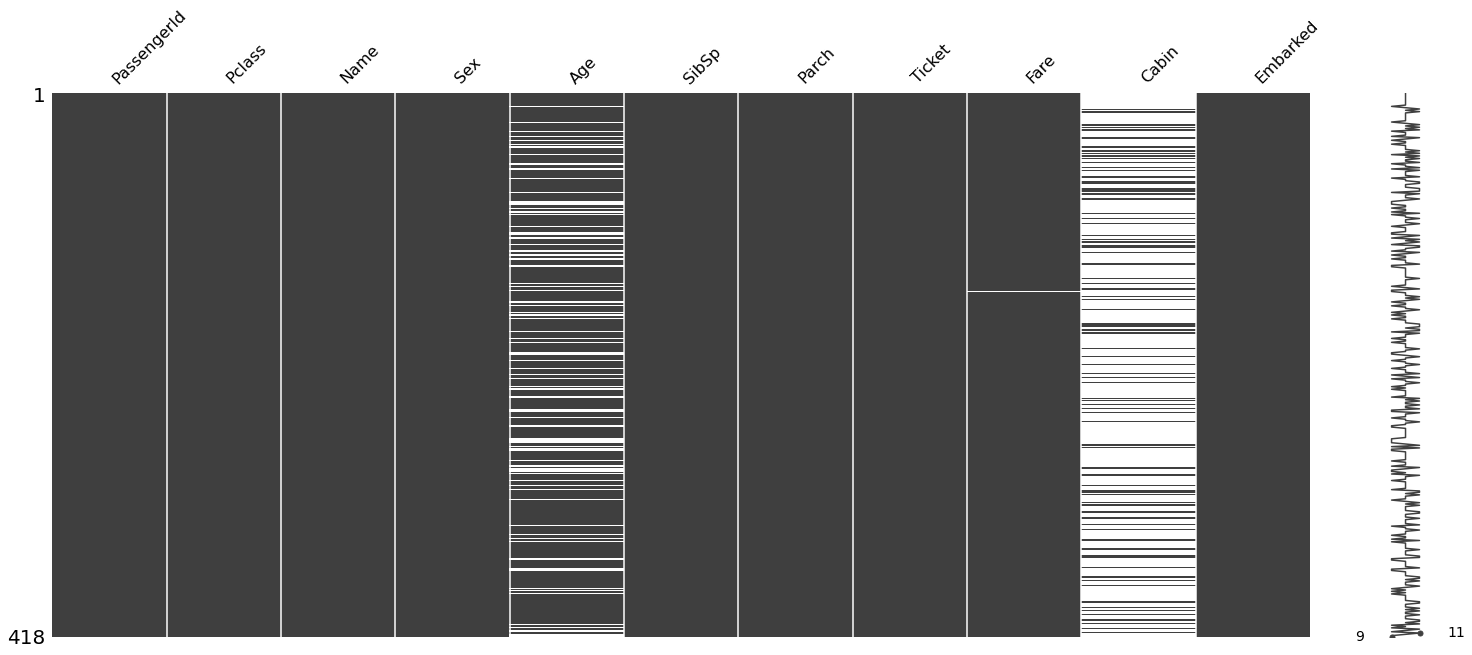

In [16]:
msno.matrix(test)

Los campos que poseen nulls son AGE y CABIN, en ambos datasets.

##### Analizamos los campos que tienen valores nan:

##### Age:

In [17]:
train['Age'].median()

28.0

In [18]:
test['Age'].median()

27.0

In [19]:
train['Age'].mode()

0    24.0
dtype: float64

In [20]:
test['Age'].mode()

0    21.0
1    24.0
dtype: float64

In [21]:
train['Age'].mean()

29.69911764705882

In [22]:
test['Age'].mean()

30.272590361445783

Lo mostramos en un dataframe así lo podemos comparar más claramente:

In [23]:
# Asignamos data
data = {' ': ['Median','Mode', 'Mean'], 'Train': [28, 24, 29], 'Test': [27, 21, 30]}

# Creamos DataFrame
rst = pd.DataFrame(data)

rst

Train  Test
0  Median     28    27
1    Mode     24    21
2    Mean     29    30

Analizamos dispersión de la variable AGE

<AxesSubplot:xlabel='Age'>

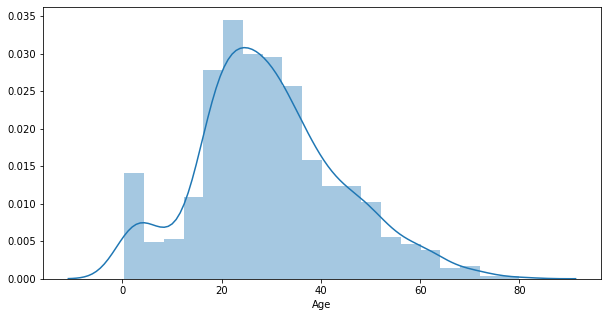

In [24]:
plt.figure(figsize=(10,5))
sns.distplot(train['Age'])

<AxesSubplot:xlabel='Age'>

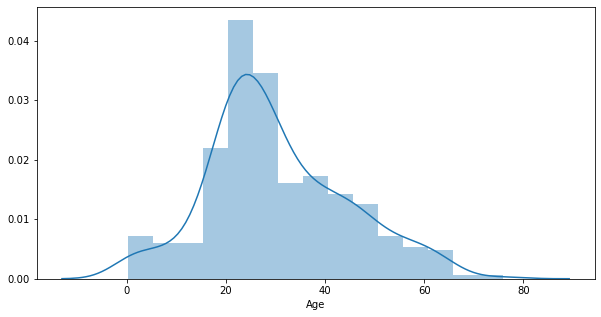

In [25]:
plt.figure(figsize=(10,5))
sns.distplot(test['Age'])

##### Cabin:

In [26]:
cabin_train = train['Cabin'].value_counts().sort_values(ascending= False ).head(10)
cabin_train

C23 C25 C27    4
G6             4
B96 B98        4
F2             3
C22 C26        3
F33            3
D              3
E101           3
D36            2
B77            2
Name: Cabin, dtype: int64

Text(0.5, 1.0, 'Cabin Train')

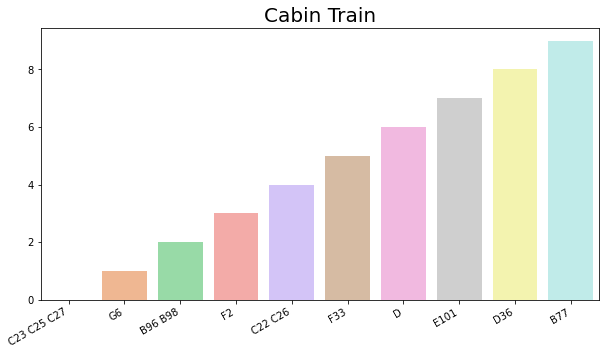

In [27]:
plt.figure(figsize=(10,5))
plot = sns.barplot(x=cabin_train.head(10).index, y=train['Cabin'].head(10).index,  palette="pastel")
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plot.set_title("Cabin Train", fontsize=20)

In [28]:
cabin_test = test['Cabin'].value_counts().sort_values(ascending= False ).head(10)
cabin_test

B57 B59 B63 B66    3
C89                2
C78                2
A34                2
B45                2
C31                2
C55 C57            2
C23 C25 C27        2
C6                 2
F4                 2
Name: Cabin, dtype: int64

Text(0.5, 1.0, 'Cabin Test')

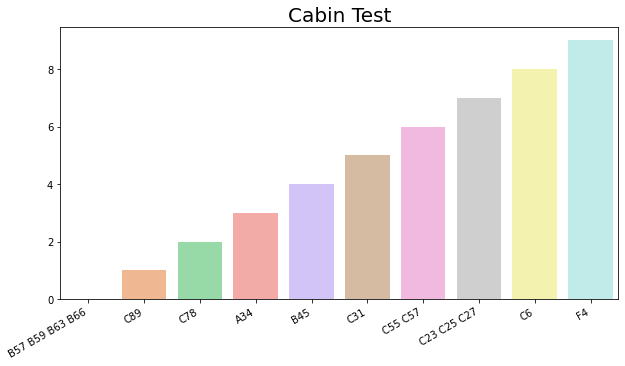

In [29]:
plt.figure(figsize=(10,5))
plot = sns.barplot(x=cabin_test.head(10).index, y=test['Cabin'].head(10).index,  palette="pastel")
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plot.set_title("Cabin Test", fontsize=20)

Debemos averiguar como vamos a trabar los nulls, ahora que ya sabemos como es la edad promedio y el tipo de cabin más comprado.

#### Arreglo de variables con nulls

##### Age

In [5]:
train['Age'].fillna(value=train['Age'].mean(), inplace=True)

In [6]:
test['Age'].fillna(value=test['Age'].mean(), inplace=True)

<AxesSubplot:xlabel='Age'>

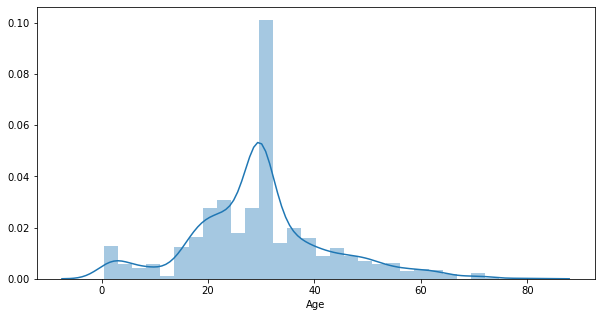

In [32]:
plt.figure(figsize=(10,5))
sns.distplot(train['Age'])

<AxesSubplot:xlabel='Age'>

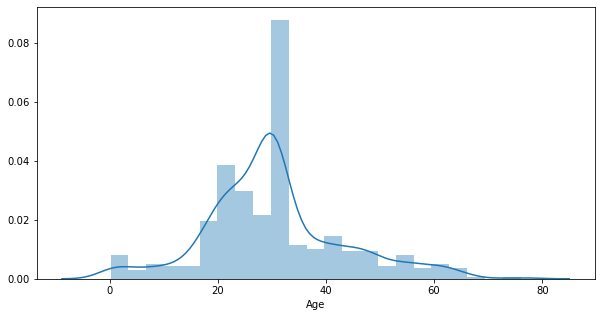

In [33]:
plt.figure(figsize=(10,5))
sns.distplot(test['Age'])

##### Cabin

In [7]:
train['Cabin'].fillna(value='E67', inplace=True)

Text(0.5, 1.0, 'Cabin Train')

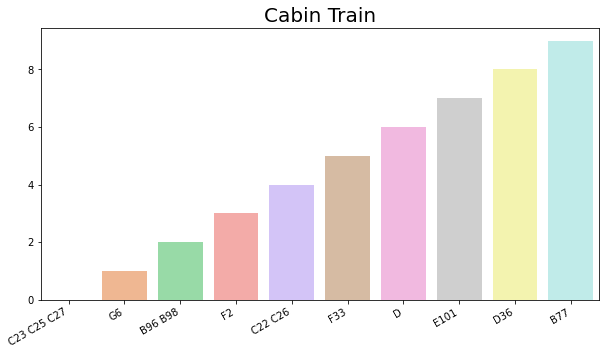

In [35]:
plt.figure(figsize=(10,5))
plot = sns.barplot(x=cabin_train.head(10).index, y=train['Cabin'].head(10).index,  palette="pastel")
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plot.set_title("Cabin Train", fontsize=20)

In [8]:
test['Cabin'].fillna(value='C116', inplace=True)

Text(0.5, 1.0, 'Cabin Train')

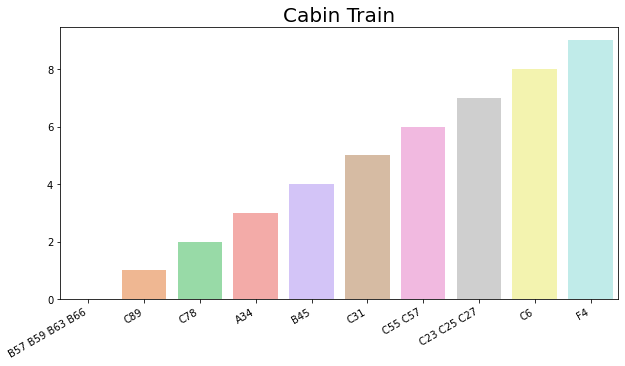

In [37]:
plt.figure(figsize=(10,5))
plot = sns.barplot(x=cabin_test.head(10).index, y=test['Cabin'].head(10).index,  palette="pastel")
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plot.set_title("Cabin Train", fontsize=20)

#### Cambio *'Sex'*

- Male = 1
- Female = 0

##### Train:

In [9]:
train['Sex'] = train['Sex'].replace(['male'],0)

In [10]:
train['Sex'] = train['Sex'].replace(['female'],1)

In [40]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   E67        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   E67        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   E67        S

##### Test:

In [11]:
test['Sex'] = test['Sex'].replace(['male'],0)

In [12]:
test['Sex'] = test['Sex'].replace(['female'],1)

In [43]:
test.head()

PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    0   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    1   
2          894       2                     Myles, Mr. Thomas Francis    0   
3          895       3                              Wirz, Mr. Albert    0   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292  C116        Q  
1  47.0      1      0   363272   7.0000  C116        S  
2  62.0      0      0   240276   9.6875  C116        Q  
3  27.0      0      0   315154   8.6625  C116        S  
4  22.0      1      1  3101298  12.2875  C116        S

#### Continuamos el EDA

In [44]:
from funpymodeling.exploratory import status

status(train)

variable  q_nan     p_nan  q_zeros   p_zeros  unique     type
0   PassengerId      0  0.000000        0  0.000000     891    int64
1      Survived      0  0.000000      549  0.616162       2    int64
2        Pclass      0  0.000000        0  0.000000       3    int64
3          Name      0  0.000000        0  0.000000     891   object
4           Sex      0  0.000000      577  0.647587       2    int64
5           Age      0  0.000000        0  0.000000      89  float64
6         SibSp      0  0.000000      608  0.682379       7    int64
7         Parch      0  0.000000      678  0.760943       7    int64
8        Ticket      0  0.000000        0  0.000000     681   object
9          Fare      0  0.000000       15  0.016835     248  float64
10        Cabin      0  0.000000        0  0.000000     147   object
11     Embarked      2  0.002245        0  0.000000       3   object

In [45]:
status(test)

variable  q_nan     p_nan  q_zeros   p_zeros  unique     type
0   PassengerId      0  0.000000        0  0.000000     418    int64
1        Pclass      0  0.000000        0  0.000000       3    int64
2          Name      0  0.000000        0  0.000000     418   object
3           Sex      0  0.000000      266  0.636364       2    int64
4           Age      0  0.000000        0  0.000000      80  float64
5         SibSp      0  0.000000      283  0.677033       7    int64
6         Parch      0  0.000000      324  0.775120       8    int64
7        Ticket      0  0.000000        0  0.000000     363   object
8          Fare      1  0.002392        2  0.004785     169  float64
9         Cabin      0  0.000000        0  0.000000      76   object
10     Embarked      0  0.000000        0  0.000000       3   object

#### Analizamos correlaciones

Las correlaciones podemos verlas también en el ProfileReport pero también podemos plotearlas nuevamente para analizarlas.


##### Train Corr:

In [46]:
train_corr = train.corr()

train_corr

PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144 -0.042939  0.033207 -0.057527   
Survived       -0.005007  1.000000 -0.338481  0.543351 -0.069809 -0.035322   
Pclass         -0.035144 -0.338481  1.000000 -0.131900 -0.331339  0.083081   
Sex            -0.042939  0.543351 -0.131900  1.000000 -0.084153  0.114631   
Age             0.033207 -0.069809 -0.331339 -0.084153  1.000000 -0.232625   
SibSp          -0.057527 -0.035322  0.083081  0.114631 -0.232625  1.000000   
Parch          -0.001652  0.081629  0.018443  0.245489 -0.179191  0.414838   
Fare            0.012658  0.257307 -0.549500  0.182333  0.091566  0.159651   

                Parch      Fare  
PassengerId -0.001652  0.012658  
Survived     0.081629  0.257307  
Pclass       0.018443 -0.549500  
Sex          0.245489  0.182333  
Age         -0.179191  0.091566  
SibSp        0.414838  0.159651  
Parch        1.000000  0.216225  
Fare         0.216225  1.000000

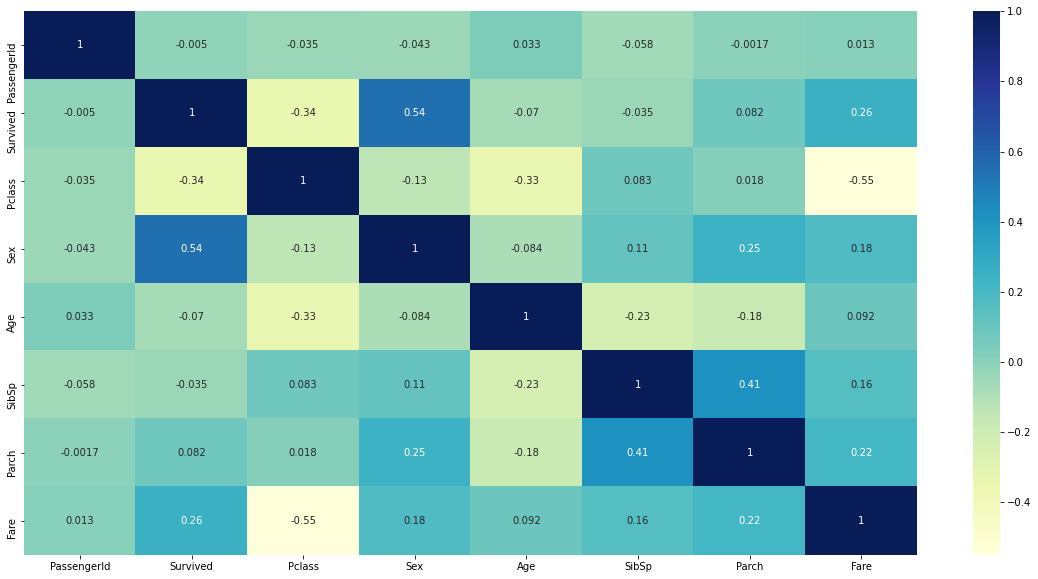

In [47]:
plt.figure(figsize=(20,10))
sns.heatmap(train_corr, annot=True, cmap='YlGnBu')
plt.savefig('corr.pdf')
plt.show()

##### Test Corr:

In [48]:
test_corr = test.corr()

test_corr

PassengerId    Pclass       Sex       Age     SibSp     Parch  \
PassengerId     1.000000 -0.026751 -0.023245 -0.030874  0.003818  0.043080   
Pclass         -0.026751  1.000000 -0.108615 -0.440782  0.001087  0.018721   
Sex            -0.023245 -0.108615  1.000000 -0.000011  0.099943  0.159120   
Age            -0.030874 -0.440782 -0.000011  1.000000 -0.079535 -0.045073   
SibSp           0.003818  0.001087  0.099943 -0.079535  1.000000  0.306895   
Parch           0.043080  0.018721  0.159120 -0.045073  0.306895  1.000000   
Fare            0.008211 -0.577147  0.191514  0.329071  0.171539  0.230046   

                 Fare  
PassengerId  0.008211  
Pclass      -0.577147  
Sex          0.191514  
Age          0.329071  
SibSp        0.171539  
Parch        0.230046  
Fare         1.000000

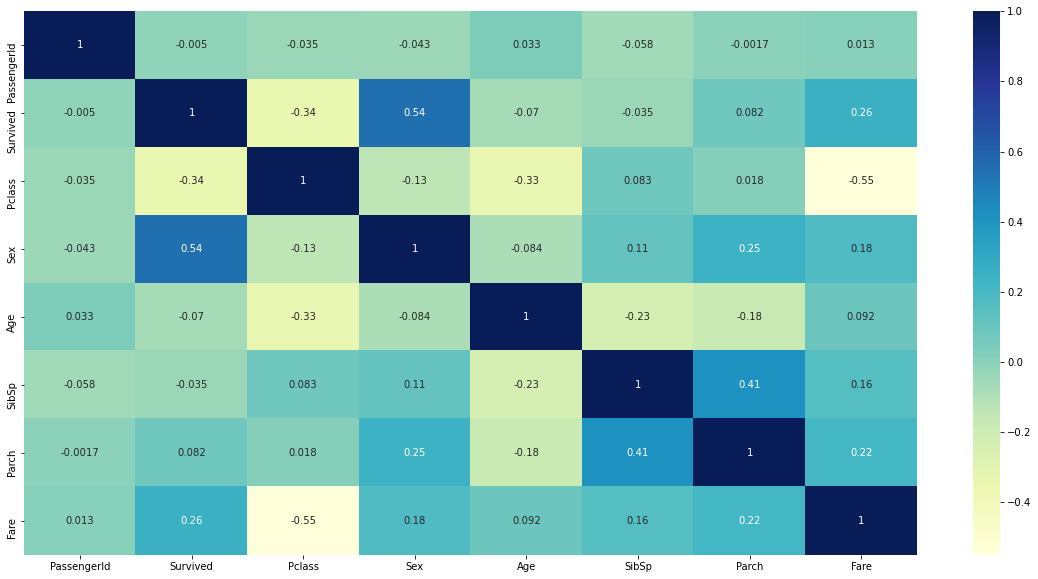

In [49]:
plt.figure(figsize=(20,10))
sns.heatmap(train_corr, annot=True, cmap='YlGnBu')
plt.savefig('corr.pdf')
plt.show()

#### Analizamos outliers

En esta instancia buscamos datos que estén por fuera de los rangos "normales". A los mismos los llamamos outliers y son valores atípicos, observaciones numéricamente distantes del resto de los datos.

El gráfico de caja (“box-plot”) es una forma de presentación estadística destinada a resaltar aspectos de la distribución de las observaciones en una o más series de datos cuantitativos. 

Text(0.5, 0, 'Fare')

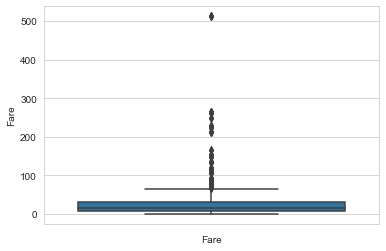

In [50]:
sns.set_style("whitegrid")

ax = sns.boxplot(data=train, y=train['Fare'])
ax.set_xlabel('Fare')

Text(0.5, 0, 'Age')

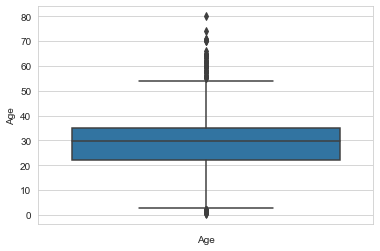

In [51]:
sns.set_style("whitegrid")

ax = sns.boxplot(data=train, y=train['Age'])
ax.set_xlabel('Age')

#### Visualizaciones

Las visualizaciones nos permitirán entender como están distribuidos los datos y entender más la muestra que estamos analizando, mucho más en este caso que estamos trabajando con u dataset desconocido.

Text(0.5, 1.0, 'Sex')

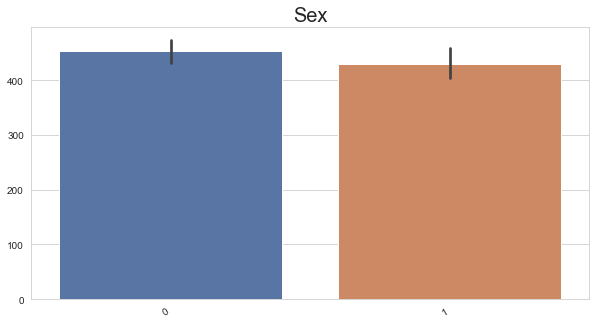

In [52]:
plt.figure(figsize=(10,5))
plot = sns.barplot(x=train['Sex'].values, y=train['Sex'].index, palette="deep")
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plot.set_title("Sex", fontsize=20)

Text(0.5, 1.0, 'Survived')

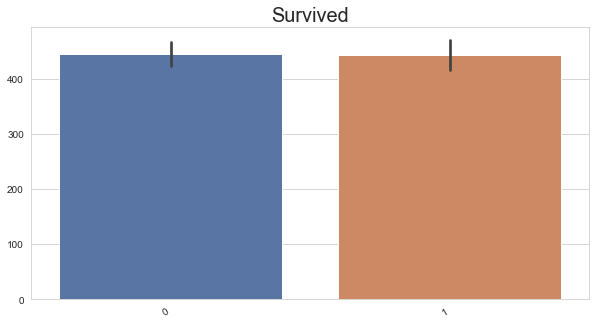

In [53]:
plt.figure(figsize=(10,5))
plot = sns.barplot(x=train['Survived'].values, y=train['Survived'].index, palette="deep")
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plot.set_title("Survived", fontsize=20)

Esto significa:

- Cero significa que NO
- Uno significa que SI 

Text(0.5, 1.0, 'Parents / children aboard the Titanic')

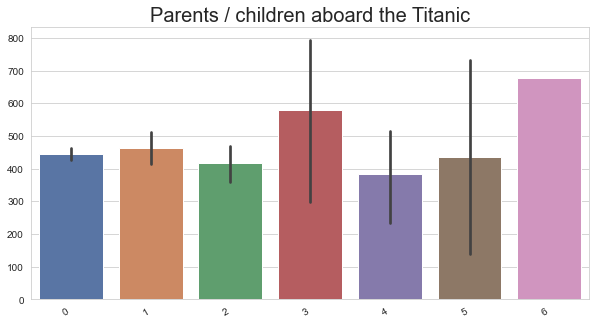

In [54]:
plt.figure(figsize=(10,5))
plot = sns.barplot(x=train['Parch'].values, y=train['Parch'].index, palette="deep")
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plot.set_title("Parents / children aboard the Titanic", fontsize=20)

Text(0.5, 1.0, 'Siblings / spouses aboard the Titanic')

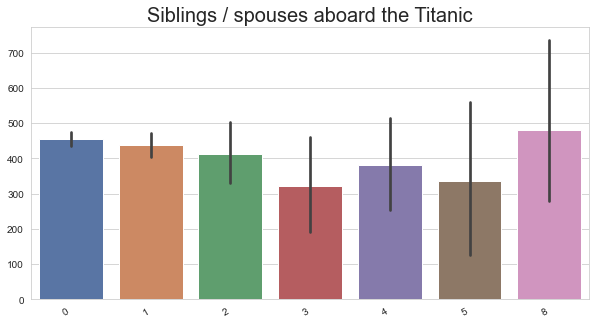

In [55]:
plt.figure(figsize=(10,5))
plot = sns.barplot(x=train['SibSp'].values, y=train['SibSp'].index, palette="deep")
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plot.set_title("Siblings / spouses aboard the Titanic", fontsize=20)

Text(0.5, 1.0, 'Port of Embarkation')

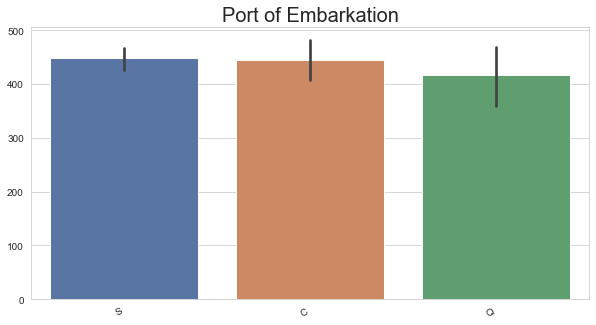

In [56]:
plt.figure(figsize=(10,5))
plot = sns.barplot(x=train['Embarked'].values, y=train['Embarked'].index, palette="deep")
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plot.set_title("Port of Embarkation", fontsize=20)

C = Cherbourg, Q = Queenstown, S = Southampton

<AxesSubplot:xlabel='Sex'>

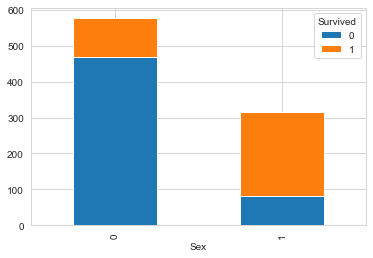

In [57]:
plot = train.groupby(['Sex','Survived']).size().reset_index().pivot(columns='Survived', index='Sex', values=0)
plot.plot(kind='bar', stacked=True)

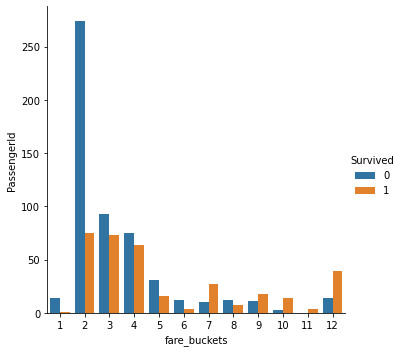

In [23]:
survivors_by_fare = train_strat.groupby(["fare_buckets","Survived"])["PassengerId"].count() 
survivors_by_fare = survivors_by_fare.reset_index()

sns.catplot(x = "fare_buckets",       # x variable name
            y = "PassengerId",       # y variable name
            hue = "Survived",  # group variable name
            data = survivors_by_fare,     # dataframe to plot
            kind = "bar")

<AxesSubplot:>

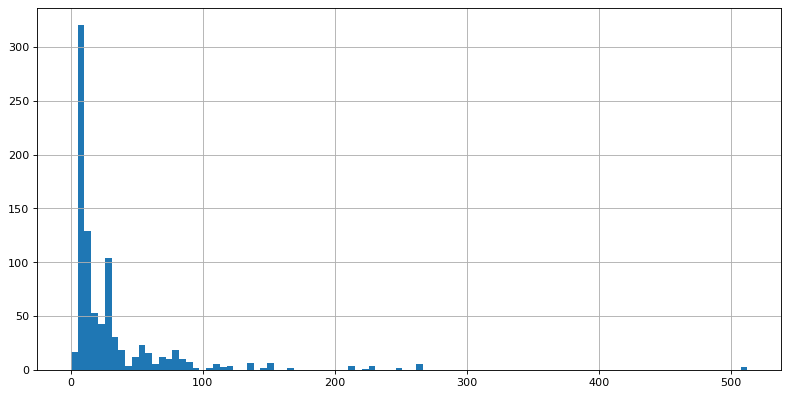

In [14]:
from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)

train["Fare"].hist(bins = 100)

<Figure size 8640x5760 with 0 Axes>

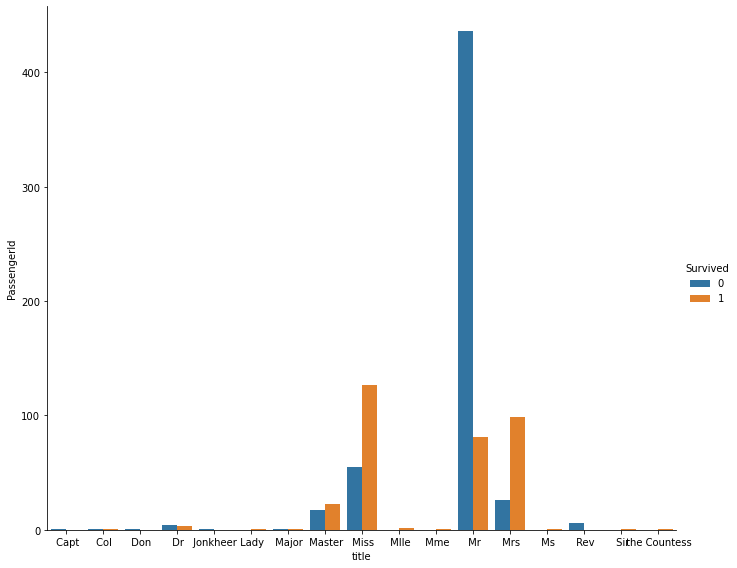

In [13]:
#sns.set(rc = {'figure.figsize':(20,8)})

train["title"] = train["Name"].str.split(',', expand = True)[1].str.split('.', expand = True)[0]

survivors_by_title = train.groupby(["title","Survived"])["PassengerId"].count() 
survivors_by_title = survivors_by_title.reset_index()

plt.figure(figsize = (120,80))
sns.catplot(x = "title",       # x variable name
            y = "PassengerId",       # y variable name
            hue = "Survived",  # group variable name
            data = survivors_by_title,     # dataframe to plot
            kind = "bar",height=8, aspect=1.2)
plt.show()

In [22]:
#estratificar por pasaje
train_strat = strat(train)

<Figure size 8640x5760 with 0 Axes>

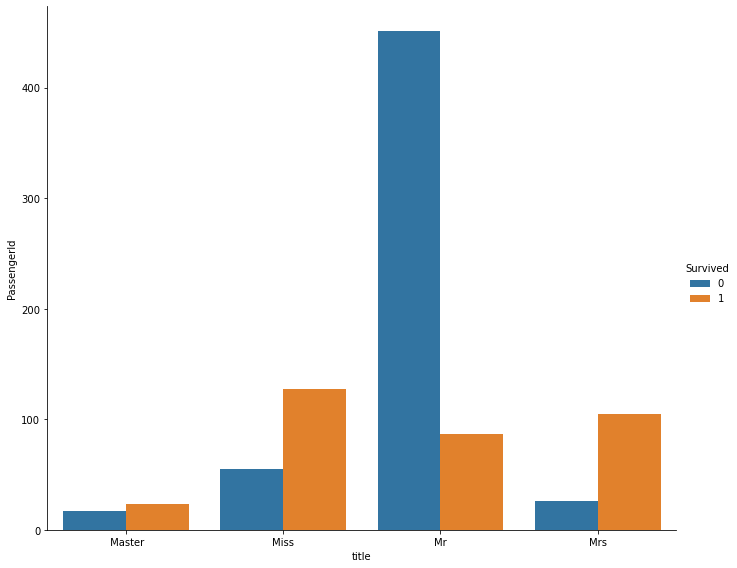

In [25]:
strat_title_train = titles(train_strat)

survivors_by_title = strat_title_train.groupby(["title","Survived"])["PassengerId"].count() 
survivors_by_title = survivors_by_title.reset_index()

plt.figure(figsize = (120,80))
sns.catplot(x = "title",       # x variable name
            y = "PassengerId",       # y variable name
            hue = "Survived",  # group variable name
            data = survivors_by_title,     # dataframe to plot
            kind = "bar",height=8, aspect=1.2)
plt.show() 

In [26]:
#contar missing values por titulo

strat_title_train.set_index('title').isna().sum(level=0)

PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
title                                                                          
Mr                 0         0       0     0    0  120      0      0       0   
Mrs                0         0       0     0    0   17      0      0       0   
Miss               0         0       0     0    0   36      0      0       0   
 Master            0         0       0     0    0    4      0      0       0   

         Fare  Cabin  Embarked  fare_buckets  
title                                         
Mr          0    437         0             0  
Mrs         0     82         1             0  
Miss        0    135         1             0  
 Master     0     33         0             0

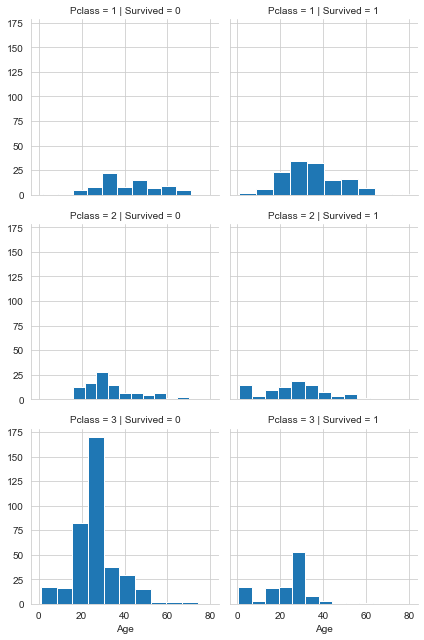

In [58]:
group = train[train.Sex == 'female']
g = sns.FacetGrid(train, col='Survived', row='Pclass')
g = g.map(plt.hist, 'Age')

<AxesSubplot:xlabel='Fare'>

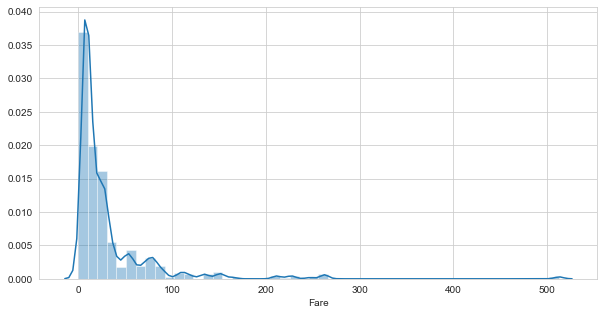

In [59]:
plt.figure(figsize=(10,5))
sns.distplot(train['Fare'])

#### Modelo Machine Learning

#### RANDOM FOREST CLASSIFIER

In [60]:
# Modolus específicos 
from sklearn.ensemble import RandomForestClassifier # Arboles de decisión para regresión

# Módulos utiles para evaluar el modelo 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [61]:
labels, counts = np.unique(train['Survived'], return_counts=True) # Función que devuelve las etiquetas y las frecuencias

print('Labels {}'.format(labels))
print('Frequencies {}'.format(counts))

Labels [0 1]
Frequencies [549 342]


In [62]:
# Features que vamos a tener en cuenta por el alto nivel de correlación que presentan
# La correlación es la que pudimos observar en la matríz de correlación que previamente ploteamos
features = ['Age', 'Sex', 'Pclass', 'SibSp', 'Parch']

# Variable a predecir
target = 'Survived'

model_clf = RandomForestClassifier()

In [63]:
model_clf.fit(train[features], train['Survived'])

RandomForestClassifier()

In [65]:
predict_train = model_clf.predict(train[features])
accuracy_score(train['Survived'], predict_train)

0.920314253647587

El modelo performó de gran modo por lo que se obtuvo un 92% de accuracy. 

Podemos también usar el recall o el presition para medir la exactitud de nuestro modelo, siempre teniendo en cuenta que difieren de elementos al momento de calcular.

##### Recall:

In [230]:
recall_train = sk.metrics.recall_score(y_pred_train, y_train)

print('El recall_train del conjunto es:', recall_train)

El recall_train del conjunto es: 0.8031496062992126


##### Precision:

In [231]:
precision_train = sk.metrics.precision_score(y_pred_train, y_train)

print('La presicion_train del conjunto es:', precision_train)

La presicion_train del conjunto es: 0.7472527472527473


##### F1:

In [232]:
f1_train = sk.metrics.f1_score(y_pred_train, y_train)

print('El f1_train del conjunto es:', f1_train)

El f1_train del conjunto es: 0.7741935483870969


#### Importancia features

Podemos ver que tan importante le resultaron las siguientes features a nuestro modelo.

In [149]:
# Importancia de cada feature
feature_importance = model_clf.feature_importances_ 

print('Features: {}'.format(features))
print('Importance = {}'.format(feature_importance))

Features: ['Age', 'Sex', 'Pclass', 'SibSp', 'Parch']
Importance = [0.40174117 0.33885482 0.14493565 0.06814097 0.0463274 ]


Text(0.5, 1.0, 'Importancia Features')

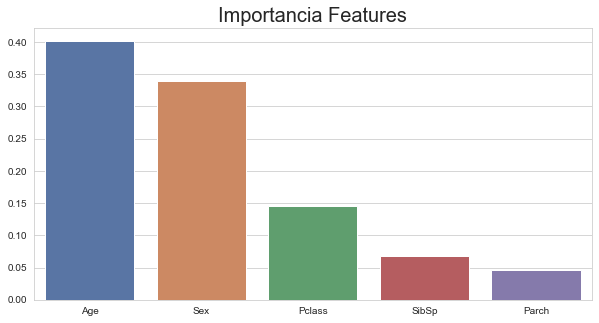

In [163]:
plt.figure(figsize=(10,5))
plot = sns.barplot(x=features, y=feature_importance, palette="deep")
plot.set_xticklabels(plot.get_xticklabels())
plot.set_title("Importancia Features", fontsize=20)

#### Subimos resultados a Kaggle

In [68]:
def upload_sub(prediction, test_df):
    output = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': prediction})
    output.to_csv('my_sub.csv', index=False)
    !kaggle competitions submit -c titanic -f my_sub.csv -m test

In [71]:
prediction_test = model_clf.predict(test[features])

upload_sub(prediction_test, test)

Successfully submitted to Titanic - Machine Learning from Disaster



  0%|          | 0.00/3.18k [00:00<?, ?B/s]
100%|##########| 3.18k/3.18k [00:00<00:00, 24.4kB/s]
100%|##########| 3.18k/3.18k [00:03<00:00, 1.00kB/s]
